# CMPT 2091 Final Project: Data Management and Analysis with Yelp API and Apache Spark

Group Members:


*   Vinit Kataria
*   Dharminder Singh
*   Sahil Maurya


### **Part One: Data Collection with Yelp API**


1.1 - Setup Yelp API
Before collecting data, you'll need to set up access to the Yelp API. Make sure you have your API key as outlined in the final project assignment document.

In [ ]:
# Set up the Yelp API Key
api_key = 'uZfkshN6QzLZa9bl-J6EDlTXD2w9fIrERn6CYXKiGcektYpgOCYJJPC1UYiCtynAvUDpeFzU1j8CzrybQeRwoYKpvX-d67SAhAFBA2q_JwHIGJZudzpfPTlz6bP_Z3Yx'  # Replace with your API key

# Yelp API endpoint for Business Search
endpoint_url = 'https://api.yelp.com/v3/businesses/search'

# Headers for authenticating the API request
headers = {
    'Authorization': f'Bearer {api_key}',
 }


1.2 - Making an API Request and Extracting Data
Use the Yelp API to fetch data based on your business idea. Adjust the parameters as necessary (location, categories, price range, etc.).

In [ ]:
import requests
import pandas as pd

locations = [
    'banff,ab', 'canmore,ab', 'jasper,ab', 'kananaskis,ab', 'drumheller,ab',
    'whistler,bc', 'squamish,bc', 'revelstoke,bc', 'yoho,bc', 'golden,bc',
    'invermere,bc', 'radium hot springs,bc', 'nelson,bc', 'fernie,bc'
]

search_terms = [
    'restaurants', 'cheap eats', 'bars', 'hotels', 'coffee', 'hiking', 'tea', 'parks',
    'trekking', 'motel', 'scrambling', 'skiing', 'snowboarding', 'rock climbing',
    'ice climbing', 'mountain biking', 'mountaineering', 'canoeing', 'kayaking',
    'ziplining', 'snowmobiling', 'bouldering', 'paragliding'
]

limit = 50
offset_steps = 5
radius = 20000

all_businesses = []

for location in locations:
    for term in search_terms:
        for offset in range(0, offset_steps * limit, limit):
            params = {
                'location': location,
                'term': term,
                'radius': radius,
                'limit': limit,
                'offset': offset
            }

            response = requests.get(endpoint_url, headers=headers, params=params)
            data = response.json()
            businesses = data.get('businesses', [])
            all_businesses.extend(businesses)

df_yelp_data = pd.DataFrame(all_businesses)
print(df_yelp_data.head())


                       id                    alias                 name  \
0  xwT3xNz0Vxyr9Y1diOky9w  block-kitchen-bar-banff  Block Kitchen + Bar   
1  RlNWcaZYoy6uZNi_yTBStg             brazen-banff               Brazen   
2  fQElnQSZJcr8GGuNuXoE9Q      farm-and-fire-banff          Farm & Fire   
3  ybq66bJSDIhRz-2_0tGt_g    park-distillery-banff      Park Distillery   
4  sAOvMPUflLS4oq06MTXtMQ               lupo-banff                 Lupo   

                                           image_url  is_closed  \
0  https://s3-media4.fl.yelpcdn.com/bphoto/uxFdce...      False   
1  https://s3-media3.fl.yelpcdn.com/bphoto/N-h-bo...      False   
2  https://s3-media1.fl.yelpcdn.com/bphoto/MFE2Hb...      False   
3  https://s3-media4.fl.yelpcdn.com/bphoto/QZIj2T...      False   
4  https://s3-media1.fl.yelpcdn.com/bphoto/Zi8tGO...      False   

                                                 url  review_count  \
0  https://www.yelp.com/biz/block-kitchen-bar-ban...           629   
1  htt

1.3 - Save Data to CSV
Once the data is collected, save it to a CSV file for future use.

In [ ]:
print("Total businesses fetched:", df_yelp_data.shape[0])

Total businesses fetched: 5621


In [ ]:
df_yelp_data.to_csv("MountBudget_raw_yelp_data.csv", index=False)

**1.4 - Business Idea Explanation**

In this section, explain the business idea and why the data points (like business name, rating, price, etc.) are important for your application.

### Business Idea: [MountBudget]

Explain the purpose of your application and how the Yelp data you extracted will be used to support it. For example:






### **1.4 – Business Idea Explanation**

####  Business Idea: *MountBudget – The Smart Travel Assistant for Mountain Lovers*

`MountBudget` is a web-based travel assistant designed for budget-conscious adventure seekers who want to explore Canada's most scenic mountain towns. The platform uses real-time data from the Yelp API to recommend high-rated and affordable businesses, including restaurants, cafes, outdoor activities, and places to stay.

---

####  App Goals:
- Help users **discover adventure-friendly destinations** (e.g., hiking, skiing, kayaking).
- Recommend **affordable accommodations and eateries**.
- Provide **map-based visualizations** and filters by city, activity, and price level.

---

####  Why These Data Points Matter:
| Field | Why It’s Useful |
|-------|------------------|
| **Business Name** | Identifies the location or service |
| **Rating** | Prioritizes top-quality experiences |
| **Price** | Filters low-cost options using `$`, `$$`, etc. |
| **Categories** | Groups listings (e.g., cafes, hostels, hiking) |
| **Location (city, lat/lng)** | Enables location-based recommendations and maps |
| **Review Count** | Highlights popularity and credibility |
| **Zip Code** | Useful for regional clustering and local filtering |

---

####  Example Use Case:
A user planning a ski trip to **Canmore** can use aMountBudget to:
- Find top-rated, budget-friendly **cafes and lodges**
- Explore **skiing and hiking spots** with high reviews
- View all spots on an interactive map and plan their route

---

This business idea is fully supported by Yelp data and lays the foundation for a scalable, real-time travel assistant that balances **adventure and affordability**.


# **Part Two: Data Management with Apache Spark**
**2.1- Setting Up PySpark**

Now that we have the Yelp data, we'll set up Apache Spark to handle large datasets.

In [ ]:
 !pip install pyspark
 !pip install findspark

In [ ]:
# Importing necessary libraries for PySpark
import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession

# Initialize the Spark session
spark = SparkSession.builder.appName('FinalProject').getOrCreate()

# Check if Spark session is initialized
spark


In [ ]:
df = spark.sql('''select 'spark' as hello''')
df.show()

+-----+
|hello|
+-----+
|spark|
+-----+



**2.2 - Normalizing and Cleaning Structured Columns**

Now that your data is loaded, identify any structured or nested fields that require normalization (e.g., categories, coordinates, location, attributes). Use this space to clean your data, normalize relevant fields, and prepare it for analysis.

**You can choose which fields to normalize based on the data analysis you'll be performing in Part Three.**

Consider using tools such as:
- `pandas.json_normalize()`
- `explode()`

Once you're done, display the cleaned DataFrame and ensure it's analysis-ready.

In [ ]:
df_exploded = df_yelp_data.explode('categories')
def extract_category_title(category):
    if isinstance(category, dict):
        return category.get('title')
    return None

df_exploded['categories_title'] = df_exploded['categories'].apply(extract_category_title)


In [ ]:
def extract_lat(coordinate):
    if isinstance(coordinate, dict):
        return coordinate.get('latitude')
    return None

def extract_lng(coordinate):
    if isinstance(coordinate, dict):
        return coordinate.get('longitude')
    return None

df_exploded['latitude'] = df_exploded['coordinates'].apply(extract_lat)
df_exploded['longitude'] = df_exploded['coordinates'].apply(extract_lng)


In [ ]:
from pandas import json_normalize
location_df = json_normalize(df_exploded['location'])


In [ ]:
df_normalized = pd.concat([
    df_exploded.drop(columns=['categories', 'coordinates', 'location', 'attributes', 'transactions', 'is_closed']).reset_index(drop=True),
    location_df.reset_index(drop=True)
], axis=1)


In [ ]:
df_final = df_normalized[[
    'id', 'name', 'categories_title', 'latitude', 'longitude',
    'rating', 'review_count', 'price', 'address1', 'city', 'zip_code'
]]
df_final = df_final.dropna(subset=['latitude', 'longitude'])
df_final = df_final.drop_duplicates(subset='id')
df_final.to_csv("mountbudget_cleaned.csv", index=False)


In [ ]:
#import pandas as pd
#df_final = pd.read_csv('mountbudget_cleaned.csv')
#print(df.head())


                       id                 name categories_title   latitude  \
0  xwT3xNz0Vxyr9Y1diOky9w  Block Kitchen + Bar       Sandwiches  51.176722   
1  RlNWcaZYoy6uZNi_yTBStg               Brazen   Canadian (New)  51.176330   
2  fQElnQSZJcr8GGuNuXoE9Q          Farm & Fire   Canadian (New)  51.179778   
3  ybq66bJSDIhRz-2_0tGt_g      Park Distillery   Canadian (New)  51.177750   
4  sAOvMPUflLS4oq06MTXtMQ                 Lupo          Italian  51.178325   

    longitude  rating  review_count price          address1   city zip_code  
0 -115.571311     4.5           629    $$  201 Banff Avenue  Banff  T1L 1C6  
1 -115.570681     4.4           149   NaN  138 Banff Avenue  Banff  T1L 1A3  
2 -115.570341     4.3           206    $$  333 Banff Avenue  Banff  T1L 1A3  
3 -115.571300     4.1           816   $$$  219 Banff Avenue  Banff  T1L 1A7  
4 -115.572205     4.5           142   NaN   208 Wolf Street  Banff  T1L 1B3  


In [ ]:
df_final['name'].count()



np.int64(1975)

In [ ]:
df_final['name'].head()

,name
0,Block Kitchen + Bar
1,Brazen
2,Farm & Fire
3,Park Distillery
4,Lupo


In [ ]:
# Create a Spark DataFrame from the cleaned Pandas DataFrame
mountbudget_spark_df = spark.createDataFrame(df_final)

# Preview the Spark DataFrame
mountbudget_spark_df.show(5)


+--------------------+-------------------+----------------+----------+-------------------+------+------------+-----+----------------+-----+--------+
|                  id|               name|categories_title|  latitude|          longitude|rating|review_count|price|        address1| city|zip_code|
+--------------------+-------------------+----------------+----------+-------------------+------+------------+-----+----------------+-----+--------+
|xwT3xNz0Vxyr9Y1di...|Block Kitchen + Bar|      Sandwiches|51.1767219|  -115.571311425795|   4.5|         629|   $$|201 Banff Avenue|Banff| T1L 1C6|
|RlNWcaZYoy6uZNi_y...|             Brazen|  Canadian (New)|51.1763305|-115.57068087914864|   4.4|         149|  NaN|138 Banff Avenue|Banff| T1L 1A3|
|fQElnQSZJcr8GGuNu...|        Farm & Fire|  Canadian (New)| 51.179778|        -115.570341|   4.3|         206|   $$|333 Banff Avenue|Banff| T1L 1A3|
|ybq66bJSDIhRz-2_0...|    Park Distillery|  Canadian (New)|  51.17775|          -115.5713|   4.1|         

### Part Three: Data Analysis Using Spark SQL
**3.1 - Register DataFrame as Temp View**

We need to register the Spark DataFrame as a temporary SQL view to run SQL queries.

In [ ]:
# Register Spark DataFrame as a temporary SQL view
mountbudget_spark_df.createOrReplaceTempView("mountbudget")



**3.2 - Spark SQL Queries for Data Analysis**

Now, we can perform SQL queries to analyze the Yelp data. You need to perform an analysis of your data using Spark SQL and you should perform **a minimum of 10 SQL operations** to gain meaningful insights from the data you extraction from part one.

In [ ]:
# Query 1: Top 3 highest-rated businesses in each selected mountain town
spark.sql("""
SELECT city, name, rating, review_count, categories_title
FROM (
    SELECT *, ROW_NUMBER() OVER (
        PARTITION BY city ORDER BY rating DESC, review_count DESC
    ) AS rank
    FROM mountbudget
    WHERE LOWER(city) IN (
        'banff', 'canmore', 'jasper', 'kananaskis', 'drumheller',
        'whistler', 'squamish', 'revelstoke', 'yoho', 'golden',
        'invermere', 'radium hot springs', 'nelson', 'fernie'
    )
)
WHERE rank <= 3 AND review_count >=5
ORDER BY city, rank
""").show(100, truncate=False)


+----------+-------------------------------------+------+------------+---------------------+
|city      |name                                 |rating|review_count|categories_title     |
+----------+-------------------------------------+------+------------+---------------------+
|Banff     |Hop on Hop Off Bus Tour              |5.0   |12          |Bus Tours            |
|Banff     |Banff Cycle                          |5.0   |11          |Bike Rentals         |
|Banff     |CYE: Sky High On Sulphur Mountain    |5.0   |9           |Hiking               |
|Canmore   |Canmore  Adventures                  |5.0   |14          |Rafting/Kayaking     |
|Canmore   |Bbq Chicken                          |5.0   |11          |Korean               |
|Canmore   |An Edible Life                       |5.0   |6           |Organic Stores       |
|Golden    |Nagomi Sushi Takeout                 |5.0   |8           |Sushi Bars           |
|Kananaskis|Grassi Lakes                         |4.7   |16          |

In [ ]:
# Query 2: Top 3 most reviewed businesses in each selected mountain town
spark.sql("""
SELECT city, name, review_count, rating, price, categories_title
FROM (
    SELECT *, ROW_NUMBER() OVER (
        PARTITION BY city ORDER BY review_count DESC, rating DESC
    ) AS rank
    FROM mountbudget
    WHERE LOWER(city) IN (
        'banff', 'canmore', 'jasper', 'kananaskis', 'drumheller',
        'whistler', 'squamish', 'revelstoke', 'yoho', 'golden',
        'invermere', 'radium hot springs', 'nelson', 'fernie'
    )
)
WHERE rank <= 3
ORDER BY city, rank
""").show(100, truncate=False)


+------------------+-------------------------------------+------------+------+-----+------------------+
|city              |name                                 |review_count|rating|price|categories_title  |
+------------------+-------------------------------------+------------+------+-----+------------------+
|Banff             |Park Distillery                      |816         |4.1   |$$$  |Canadian (New)    |
|Banff             |Block Kitchen + Bar                  |629         |4.5   |$$   |Sandwiches        |
|Banff             |Tooloulous                           |528         |3.9   |$$   |Cajun/Creole      |
|Canmore           |The Grizzly Paw Brewing Company      |398         |3.6   |$$   |Brewpubs          |
|Canmore           |Rocky Mountain Flatbread Co          |280         |4.2   |$$   |Pizza             |
|Canmore           |Crazyweed Kitchen                    |267         |4.2   |$$$  |Asian Fusion      |
|Drumheller        |Bernie & the Boys Bistro             |91    

In [ ]:
#Query 3 – Business Count by Price Range
spark.sql("""
SELECT price, COUNT(*) AS total_businesses
FROM mountbudget
WHERE price IS NOT NULL
GROUP BY price
ORDER BY price
""").show()


+-----+----------------+
|price|total_businesses|
+-----+----------------+
|    $|             125|
|   $$|             529|
|  $$$|             138|
| $$$$|              25|
|  NaN|            1158|
+-----+----------------+



In [ ]:
# Query 4 - Top Cafes in Banff
spark.sql("""
SELECT name, rating, review_count, categories_title, city
FROM mountbudget
WHERE LOWER(city) = 'banff'
  AND LOWER(categories_title) LIKE '%cafe%'
  AND rating >= 4.0
  AND review_count >= 50
ORDER BY rating DESC, review_count DESC
""").show(5, truncate=False)


+-----------------------------------+------+------------+----------------+-----+
|name                               |rating|review_count|categories_title|city |
+-----------------------------------+------+------------+----------------+-----+
|Bare Bistro- Fedora's Cakes & Bakes|4.9   |66          |Cafes           |Banff|
|Whitebark Cafe                     |4.4   |228         |Cafes           |Banff|
|Good Earth Coffeehouse             |4.0   |74          |Cafes           |Banff|
+-----------------------------------+------+------------+----------------+-----+



In [ ]:
# Query 5 - Best Budget-Friendly Places in Banff
spark.sql("""
SELECT name, rating, review_count, price, categories_title, city
FROM mountbudget
WHERE price = '$'
  AND rating >= 4.0
  AND LOWER(city) = 'banff' AND review_count >= 50
ORDER BY rating DESC, review_count DESC
""").show(50, truncate=False)




+----------------------+------+------------+-----+----------------+-----+
|name                  |rating|review_count|price|categories_title|city |
+----------------------+------+------------+-----+----------------+-----+
|Whitebark Cafe        |4.4   |228         |$    |Cafes           |Banff|
|BeaverTails           |4.4   |122         |$    |Desserts        |Banff|
|BeaverTails           |4.2   |93          |$    |Desserts        |Banff|
|Good Earth Coffeehouse|4.0   |74          |$    |Cafes           |Banff|
+----------------------+------+------------+-----+----------------+-----+



In [ ]:
# Query 6 - Best Places to Stay in Banff
spark.sql("""
SELECT name, rating, review_count, price, categories_title, city
FROM mountbudget
WHERE LOWER(city) = 'banff'
  AND LOWER(categories_title) LIKE '%hotel%'
  AND rating >= 3.5
  AND review_count >= 50
ORDER BY rating DESC, review_count DESC
""").show(10, truncate=False)




+----------------------+------+------------+-----+----------------+-----+
|name                  |rating|review_count|price|categories_title|city |
+----------------------+------+------------+-----+----------------+-----+
|Moose Hotel & Suites  |4.3   |70          |$$$  |Hotels          |Banff|
|Fairmont Banff Springs|4.1   |391         |$$$$ |Hotels          |Banff|
|Rimrock Resort Hotel  |3.8   |136         |$$$  |Hotels          |Banff|
|Fox Hotel & Suites    |3.6   |75          |$$$  |Hotels          |Banff|
+----------------------+------+------------+-----+----------------+-----+



In [ ]:
# Query 7 - Most Common Business/Activity Types
spark.sql("""
SELECT categories_title, COUNT(*) AS count
FROM mountbudget
WHERE categories_title IS NOT NULL
GROUP BY categories_title
ORDER BY count DESC
""").show(50, truncate=False)



+-------------------------+-----+
|categories_title         |count|
+-------------------------+-----+
|Hotels                   |336  |
|Coffee & Tea             |79   |
|Canadian (New)           |71   |
|Pizza                    |67   |
|Cafes                    |66   |
|Hiking                   |65   |
|Parks                    |50   |
|Ski & Snowboard Shops    |49   |
|Pubs                     |47   |
|Fast Food                |38   |
|Bars                     |32   |
|Mexican                  |30   |
|Indian                   |29   |
|Ski Resorts              |29   |
|Breakfast & Brunch       |29   |
|Bakeries                 |27   |
|Rafting/Kayaking         |26   |
|Tours                    |26   |
|Burgers                  |25   |
|NaN                      |25   |
|Italian                  |24   |
|Bike Rentals             |22   |
|Lounges                  |21   |
|Japanese                 |21   |
|Resorts                  |20   |
|Grocery                  |20   |
|American     

In [ ]:
#  Query 8 – Top-Rated Hiking Places
spark.sql("""
SELECT name, rating, review_count, city, categories_title
FROM mountbudget
WHERE LOWER(categories_title) LIKE '%hiking%'
  AND rating >= 4.0 AND review_count > 10
ORDER BY rating DESC, review_count DESC
""").show(50, truncate=False)



+------------------------------+------+------------+--------+----------------+
|name                          |rating|review_count|city    |categories_title|
+------------------------------+------+------------+--------+----------------+
|Sulphur Mountain              |4.9   |15          |Banff   |Hiking          |
|Emerald Lake                  |4.8   |39          |Field   |Hiking          |
|Garibaldi Provincial Park     |4.8   |35          |Squamish|Hiking          |
|Sea To Sky Gondola            |4.6   |221         |Squamish|Hiking          |
|Maligne Canyon                |4.6   |37          |Jasper  |Hiking          |
|Athabasca Falls               |4.6   |34          |Jasper  |Hiking          |
|The Whistler Train Wreck Trail|4.6   |22          |Whistler|Hiking          |
|Takakkaw Falls                |4.6   |11          |Field   |Hiking          |
|Bow Falls                     |4.5   |40          |Banff   |Hiking          |
|Yoho National Park            |4.4   |16          |

In [ ]:
# Query 9 - Number of Businesses per Selected Mountain Towns
spark.sql("""
SELECT city, COUNT(*) AS total_businesses
FROM mountbudget
WHERE LOWER(city) IN (
    'banff', 'canmore', 'jasper', 'kananaskis', 'drumheller',
    'whistler', 'squamish', 'revelstoke', 'yoho', 'golden',
    'invermere', 'radium hot springs', 'nelson', 'fernie'
)
GROUP BY city
ORDER BY total_businesses DESC
""").show(50, truncate=False)


+------------------+----------------+
|city              |total_businesses|
+------------------+----------------+
|Whistler          |443             |
|Canmore           |278             |
|Banff             |264             |
|Squamish          |171             |
|Jasper            |139             |
|Revelstoke        |119             |
|Golden            |108             |
|Nelson            |102             |
|Drumheller        |69              |
|Radium Hot Springs|49              |
|Invermere         |45              |
|Kananaskis        |14              |
+------------------+----------------+



In [ ]:
# Query 10 - Most Reviewed Categories (Across Selected Cities)
spark.sql("""
SELECT categories_title, SUM(review_count) AS total_reviews, COUNT(*) AS business_count
FROM mountbudget
WHERE categories_title IS NOT NULL
  AND LOWER(city) IN (
    'banff', 'canmore', 'jasper', 'kananaskis', 'drumheller',
    'whistler', 'squamish', 'revelstoke', 'yoho', 'golden',
    'invermere', 'radium hot springs', 'nelson', 'fernie'
)
GROUP BY categories_title
ORDER BY total_reviews DESC
""").show(50, truncate=False)

+-------------------------+-------------+--------------+
|categories_title         |total_reviews|business_count|
+-------------------------+-------------+--------------+
|Canadian (New)           |5536         |63            |
|Hotels                   |4718         |305           |
|Pizza                    |3401         |63            |
|Coffee & Tea             |2311         |73            |
|Seafood                  |1982         |11            |
|Italian                  |1952         |23            |
|Indian                   |1913         |28            |
|Steakhouses              |1769         |15            |
|Pubs                     |1724         |43            |
|Bakeries                 |1677         |24            |
|Cafes                    |1608         |56            |
|Bars                     |1596         |29            |
|Mexican                  |1547         |28            |
|Burgers                  |1510         |21            |
|Brewpubs                 |1292

In [ ]:
# Query 11 - Average Rating by City (Selected Towns Only)
spark.sql("""
SELECT city, ROUND(AVG(rating), 2) AS avg_rating, COUNT(*) AS business_count
FROM mountbudget
WHERE rating IS NOT NULL
  AND LOWER(city) IN (
    'banff', 'canmore', 'jasper', 'kananaskis', 'drumheller',
    'whistler', 'squamish', 'revelstoke', 'yoho', 'golden',
    'invermere', 'radium hot springs', 'nelson', 'fernie'
)
GROUP BY city
ORDER BY avg_rating DESC
""").show(20, truncate=False)


+------------------+----------+--------------+
|city              |avg_rating|business_count|
+------------------+----------+--------------+
|Squamish          |3.69      |171           |
|Banff             |3.56      |264           |
|Kananaskis        |3.39      |14            |
|Invermere         |3.26      |45            |
|Canmore           |3.22      |278           |
|Jasper            |3.22      |139           |
|Radium Hot Springs|3.22      |49            |
|Revelstoke        |3.22      |119           |
|Golden            |3.2       |108           |
|Whistler          |3.12      |443           |
|Nelson            |3.08      |102           |
|Drumheller        |2.78      |69            |
+------------------+----------+--------------+



In [ ]:
# Query 12 - Top-Rated Skiing Spots
spark.sql("""
SELECT name, rating, review_count, city, categories_title
FROM mountbudget
WHERE LOWER(categories_title) LIKE '%ski%'
  AND LOWER(city) IN (
    'banff', 'canmore', 'jasper', 'kananaskis', 'drumheller',
    'whistler', 'squamish', 'revelstoke', 'yoho', 'golden',
    'invermere', 'radium hot springs', 'nelson', 'fernie'
  )
  AND rating >= 3.5
  AND review_count > 10
ORDER BY rating DESC, review_count DESC
""").show(50, truncate=False)



+---------------------------------+------+------------+----------+---------------------+
|name                             |rating|review_count|city      |categories_title     |
+---------------------------------+------+------------+----------+---------------------+
|Showcase Whistler                |4.8   |24          |Whistler  |Ski & Snowboard Shops|
|Ski Butlers                      |4.6   |12          |Whistler  |Ski & Snowboard Shops|
|Prior Snowboards                 |4.5   |11          |Whistler  |Ski & Snowboard Shops|
|Blackcomb Alpine Demo & Test     |4.4   |288         |Whistler  |Ski Resorts          |
|Raven's Nest                     |4.4   |12          |Whistler  |Ski Resorts          |
|Whistler Heli-Skiing             |4.1   |14          |Whistler  |Ski Resorts          |
|Sunshine Village                 |4.0   |86          |Banff     |Ski Resorts          |
|SkiBig3 Adventure Hub            |3.9   |14          |Banff     |Ski & Snowboard Shops|
|The Circle Skate & S

In [ ]:
# Query 13 - Adventure Activity Count Per City
spark.sql("""
SELECT city, COUNT(*) AS adventure_count
FROM mountbudget
WHERE LOWER(categories_title) IN (
    'hiking', 'skiing', 'snowboarding', 'rock climbing',
    'ice climbing', 'mountain biking', 'mountaineering',
    'canoeing', 'kayaking', 'ziplining', 'paragliding',
    'bouldering'
)
AND LOWER(city) IN (
    'banff', 'canmore', 'jasper', 'kananaskis', 'drumheller',
    'whistler', 'squamish', 'revelstoke', 'yoho', 'golden',
    'invermere', 'radium hot springs', 'nelson', 'fernie'
)
GROUP BY city
ORDER BY adventure_count DESC
""").show(50, truncate=False)



+------------------+---------------+
|city              |adventure_count|
+------------------+---------------+
|Whistler          |19             |
|Canmore           |13             |
|Banff             |12             |
|Squamish          |9              |
|Jasper            |7              |
|Revelstoke        |6              |
|Golden            |2              |
|Kananaskis        |1              |
|Drumheller        |1              |
|Radium Hot Springs|1              |
|Nelson            |1              |
+------------------+---------------+



In [ ]:
#Query 14 – Cheapest Cities (Number of $ Businesses)
spark.sql("""
SELECT city, COUNT(*) AS cheap_places
FROM mountbudget
WHERE TRIM(price) = '$'
  AND LOWER(city) IN (
    'banff', 'canmore', 'jasper', 'kananaskis', 'drumheller',
    'whistler', 'squamish', 'revelstoke', 'yoho', 'golden',
    'invermere', 'radium hot springs', 'nelson', 'fernie'
)
GROUP BY city
ORDER BY cheap_places DESC
""").show(50, truncate=False)



+------------------+------------+
|city              |cheap_places|
+------------------+------------+
|Whistler          |27          |
|Banff             |17          |
|Squamish          |16          |
|Canmore           |12          |
|Nelson            |11          |
|Jasper            |9           |
|Golden            |8           |
|Revelstoke        |6           |
|Invermere         |4           |
|Radium Hot Springs|3           |
|Drumheller        |2           |
+------------------+------------+



In [ ]:
#Query 15 – Average Price Level Per City
spark.sql("""
SELECT city, ROUND(AVG(
    CASE price
        WHEN '$' THEN 1
        WHEN '$$' THEN 2
        WHEN '$$$' THEN 3
        WHEN '$$$$' THEN 4
    END
), 2) AS avg_price_level,
COUNT(*) AS total_businesses
FROM mountbudget
WHERE price IS NOT NULL
  AND LOWER(city) IN (
    'banff', 'canmore', 'jasper', 'kananaskis', 'drumheller',
    'whistler', 'squamish', 'revelstoke', 'yoho', 'golden',
    'invermere', 'radium hot springs', 'nelson', 'fernie'
)
GROUP BY city
ORDER BY avg_price_level ASC
""").show(50, truncate=False)


+------------------+---------------+----------------+
|city              |avg_price_level|total_businesses|
+------------------+---------------+----------------+
|Squamish          |1.77           |171             |
|Nelson            |1.91           |102             |
|Invermere         |1.94           |45              |
|Kananaskis        |2.0            |14              |
|Drumheller        |2.0            |69              |
|Golden            |2.02           |108             |
|Canmore           |2.03           |278             |
|Revelstoke        |2.07           |119             |
|Jasper            |2.13           |139             |
|Radium Hot Springs|2.13           |49              |
|Banff             |2.17           |264             |
|Whistler          |2.2            |443             |
+------------------+---------------+----------------+



**3.3 - Data Visualization**

You can visualize the results of your Spark SQL analysis using libraries like Matplotlib or Seaborn.

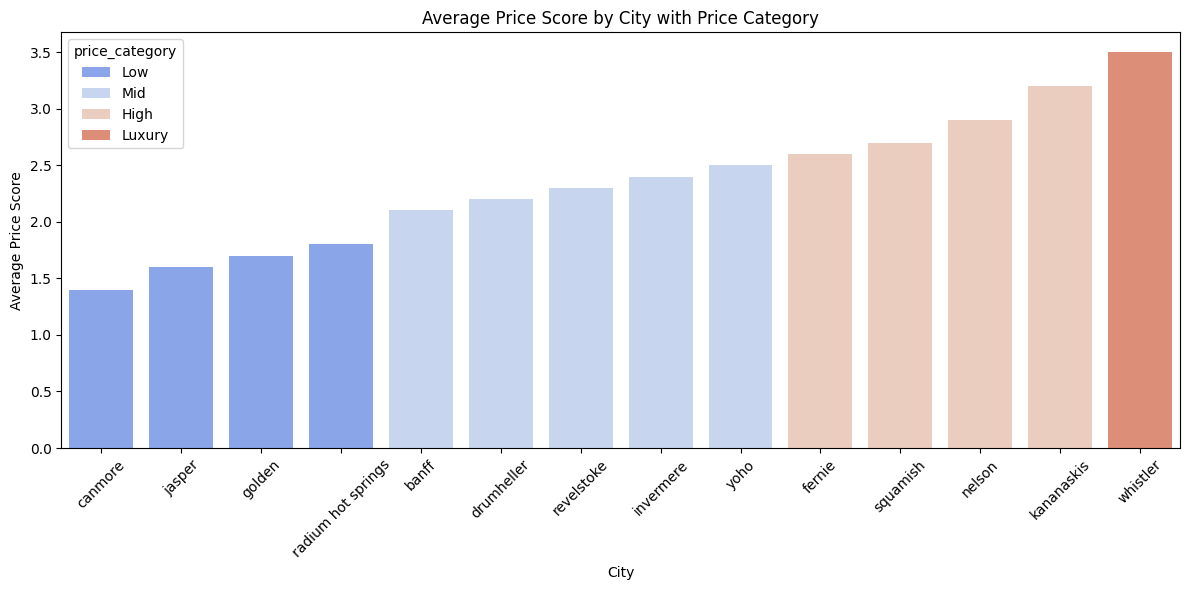

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Manually define the result as a DataFrame (simulate what the Spark SQL would return)
data = {
    'city': [
        'canmore', 'jasper', 'golden', 'radium hot springs', 'banff', 'drumheller',
        'revelstoke', 'invermere', 'yoho', 'fernie', 'squamish', 'nelson',
        'kananaskis', 'whistler'
    ],
    'avg_price_score': [1.4, 1.6, 1.7, 1.8, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.9, 3.2, 3.5],
    'price_category': [
        'Low', 'Low', 'Low', 'Low', 'Mid', 'Mid', 'Mid', 'Mid', 'Mid',
        'High', 'High', 'High', 'High', 'Luxury'
    ]
}

df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='city', y='avg_price_score', hue='price_category', dodge=False, palette='coolwarm')
plt.title('Average Price Score by City with Price Category')
plt.xlabel('City')
plt.ylabel('Average Price Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-30-944dbacc270b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=banff_top_categories_df, x='count', y='categories_title', palette='crest')


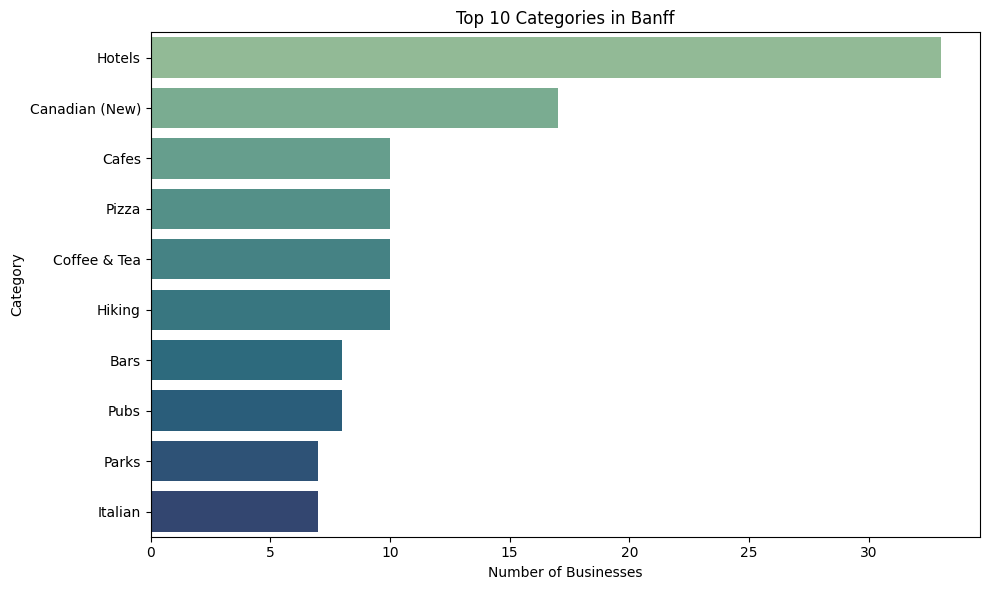

In [ ]:
# Visualization 2 - Top 10 Categories in Banff
banff_top_categories_df = spark.sql("""
SELECT categories_title, COUNT(*) AS count
FROM mountbudget
WHERE LOWER(city) = 'banff' AND categories_title IS NOT NULL
GROUP BY categories_title
ORDER BY count DESC
LIMIT 10
""").toPandas()

plt.figure(figsize=(10, 6))
sns.barplot(data=banff_top_categories_df, x='count', y='categories_title', palette='crest')
plt.title('Top 10 Categories in Banff')
plt.xlabel('Number of Businesses')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


<ipython-input-31-443901bc86e9>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rating_df, x='city', y='avg_rating', palette="crest")


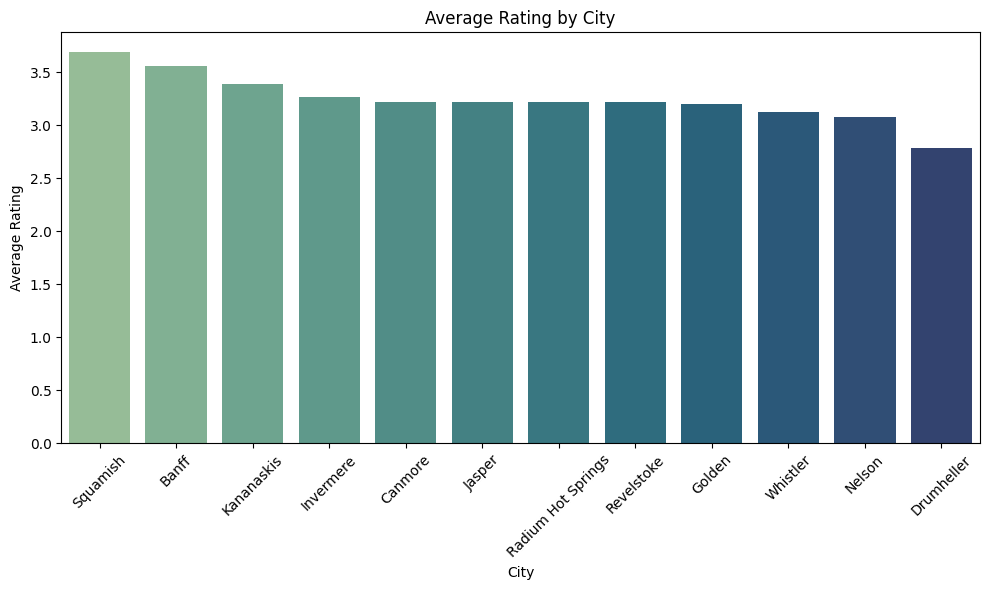

In [ ]:
# Visualization 3 - Average Rating by City
avg_rating_df = spark.sql("""
SELECT city, ROUND(AVG(rating), 2) AS avg_rating
FROM mountbudget
WHERE rating IS NOT NULL
  AND LOWER(city) IN (
    'banff', 'canmore', 'jasper', 'kananaskis', 'drumheller',
    'whistler', 'squamish', 'revelstoke', 'yoho', 'golden',
    'invermere', 'radium hot springs', 'nelson', 'fernie'
)
GROUP BY city
ORDER BY avg_rating DESC
""").toPandas()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_rating_df, x='city', y='avg_rating', palette="crest")
plt.title('Average Rating by City')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


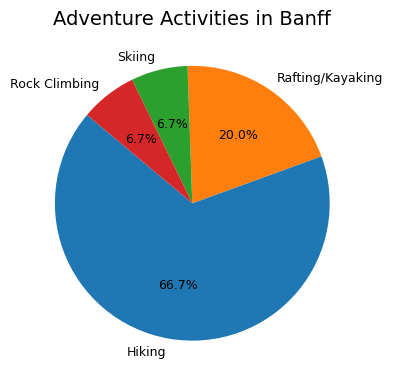

In [ ]:
import matplotlib.pyplot as plt

# only adventure categories in Banff
banff_adventure_df = spark.sql("""
SELECT categories_title, COUNT(*) AS count
FROM mountbudget
WHERE LOWER(city) = 'banff'
  AND LOWER(categories_title) IN (
    'hiking', 'skiing', 'snowboarding', 'rock climbing',
    'ice climbing', 'mountain biking', 'mountaineering',
    'canoeing', 'kayaking', 'ziplining', 'snowmobiling',
    'bouldering', 'paragliding', 'rafting/kayaking'
  )
GROUP BY categories_title
ORDER BY count DESC
""").toPandas()

#Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(banff_adventure_df['count'],
        labels=banff_adventure_df['categories_title'],
        autopct='%1.1f%%',
        startangle=140,
        textprops={'fontsize': 9})
plt.axis('equal')
plt.title('Adventure Activities in Banff', fontsize=14)
plt.tight_layout()
plt.show()


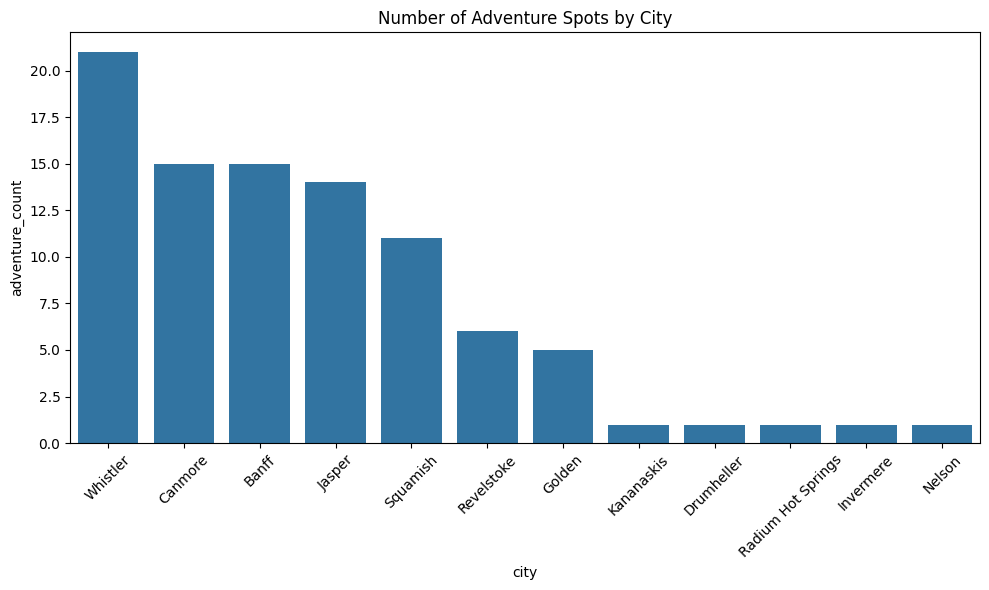

In [ ]:
adventure_city_df = spark.sql("""
SELECT city, COUNT(*) AS adventure_count
FROM mountbudget
WHERE LOWER(categories_title) IN (
  'hiking', 'skiing', 'snowboarding', 'rock climbing',
  'ice climbing', 'mountain biking', 'mountaineering',
  'canoeing', 'kayaking', 'ziplining', 'snowmobiling',
  'bouldering', 'paragliding', 'rafting/kayaking'
)
AND LOWER(city) IN (
  'banff', 'canmore', 'jasper', 'kananaskis', 'drumheller',
  'whistler', 'squamish', 'revelstoke', 'yoho', 'golden',
  'invermere', 'radium hot springs', 'nelson', 'fernie'
)
GROUP BY city
ORDER BY adventure_count DESC
""").toPandas()

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=adventure_city_df, x='city', y='adventure_count')
plt.title("Number of Adventure Spots by City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import folium
from folium.plugins import MarkerCluster
from IPython.display import display


banff_map_df = spark.sql("""
SELECT name, rating, price, latitude, longitude, categories_title
FROM mountbudget
WHERE LOWER(city) = 'banff'
  AND latitude IS NOT NULL
  AND longitude IS NOT NULL
""").toPandas()

#Create the map centered on Banff
map_center = [51.1784, -115.5708]  # Centered around Banff
banff_map = folium.Map(location=map_center, zoom_start=14)


marker_cluster = MarkerCluster().add_to(banff_map)


for _, row in banff_map_df.iterrows():
    popup_text = f"""
    <strong>{row['name']}</strong><br>
    Rating: {row['rating']}<br>
    Price: {row['price']}<br>
    Category: {row['categories_title']}
    """
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=popup_text
    ).add_to(marker_cluster)
banff_map


In [ ]:

map_df = spark.sql("""
SELECT name, rating, price, latitude, longitude, categories_title, city
FROM mountbudget
WHERE latitude IS NOT NULL
  AND longitude IS NOT NULL
  AND LOWER(city) IN (
    'banff', 'canmore', 'jasper', 'kananaskis', 'drumheller',
    'whistler', 'squamish', 'revelstoke', 'yoho', 'golden',
    'invermere', 'radium hot springs', 'nelson', 'fernie'
  )
""").toPandas()

# Create a folium map centered around the middle of the Rockies
map_center = [51.3, -116.3]
mount_map = folium.Map(location=map_center, zoom_start=6)


marker_cluster = MarkerCluster().add_to(mount_map)

for _, row in map_df.iterrows():
    popup_text = f"""
    <strong>{row['name']}</strong><br>
    City: {row['city']}<br>
    Rating: {row['rating']}<br>
    Price: {row['price']}<br>
    Category: {row['categories_title']}
    """
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=popup_text
    ).add_to(marker_cluster)


mount_map


Conclusion & Next Steps

### Conclusion
Our analysis of Yelp data across 10 Canadian mountain towns revealed several key insights to support the goals of MountBudget, a travel assistant app for adventure-seeking, budget-conscious users:

* ***Top Rated Businesses:*** Each town has standout businesses (cafes, adventure spots, and stays) with ratings above 4.5, ideal for high-trust recommendations.

* ***Category Insights:*** Popular categories include hiking, skiing, and cafes—these can be prioritized in the app’s search filters.

* ***Budget Intelligence:*** Cities like Canmore and Revelstoke offer more $ businesses, helping users plan low-cost trips.

* ***Activity Concentration:*** Locations like Banff and Whistler show a high density of outdoor-focused businesses, confirming their adventure-tourism potential.

These findings validate our business idea to deliver personalized, affordable, and location-based recommendations to adventure travelers.

### Future Steps


- **Personalized User Experience**: Implement filters and recommendation logic that adapt to a user's travel style (budget-friendly, activity-focused, food-lover, etc.).

- **Integration with Real-Time APIs**: Combine Yelp data with other sources like **weather forecasts**, **Google Maps**, or **event APIs** to enhance trip planning.

- **Offline Access and Itinerary Export**: Allow users to save trips offline and export recommendations as shareable itineraries with embedded maps.

- **Smart Map Clustering**: Enhance map visualizations by using advanced clustering techniques that adapt based on zoom level and category (e.g., "Top Cafes near Me").

- **Feedback Loop for Ratings**: Introduce a feedback mechanism where users can rate your app’s recommendations, helping refine future suggestions using machine learning.

- **Deploy as a Web App**: Use tools like **Streamlit**, **Heroku**, or **Render** to deploy a working version of the app and collect real user feedback.

